In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
admission = pd.read_csv('C:/Users/Hp/Desktop/sanjaykiren/archive/Admission_Predict.csv')


In [37]:
admission.head() # to see the top five records of the data sets

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
admission.shape # to  see what is the shape of data_set our data set has 400 records and 9 fields

(400, 9)

In [39]:
admission.columns #to see the name of the fields 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [40]:
admission.describe() # to see the mathematical values of the data sets i.e mean,standar_deviation ,minimum_value,maximum_value,counts etc.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [41]:
admission.info() #to see the type of values in every fields i.e int ,float etc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [42]:
admission.isnull().sum() # to see that if dataset has any null_values or not

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [43]:
X=admission.drop(['Serial No.','Chance of Admit '],axis=1) #input data_set
X.shape

(400, 7)

In [44]:
y=admission['Chance of Admit '] #output labels
y.shape

(400,)

In [45]:
admission.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
271,272,299,96,2,1.5,2.0,7.86,0,0.54
376,377,297,96,2,2.5,2.0,7.43,0,0.34
200,201,317,103,3,2.5,3.0,8.54,1,0.73
27,28,298,98,2,1.5,2.5,7.50,1,0.44
347,348,299,94,1,1.0,1.0,7.34,0,0.42


***#now observing the inter_relation between various fiels in dataset using graps***

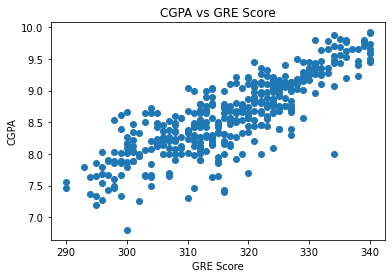

In [46]:
plt.scatter(admission['GRE Score'],admission['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

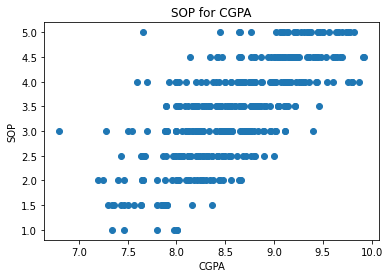

In [47]:
plt.scatter(admission['CGPA'],admission['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

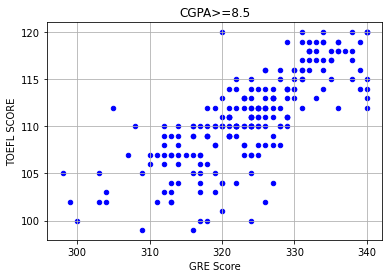

In [48]:
admission[admission.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

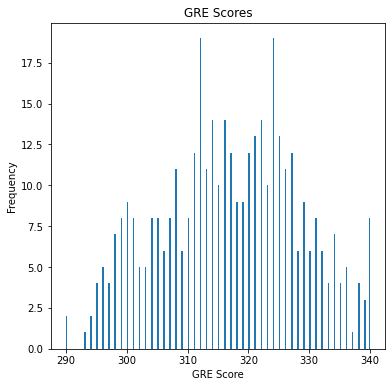

In [49]:
admission["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

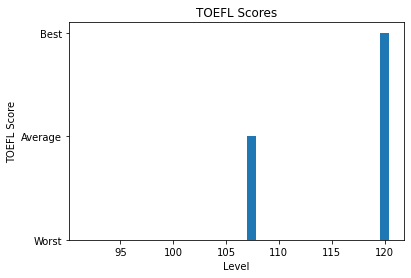

In [50]:

p = np.array([admission["TOEFL Score"].min(),admission["TOEFL Score"].mean(),admission["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

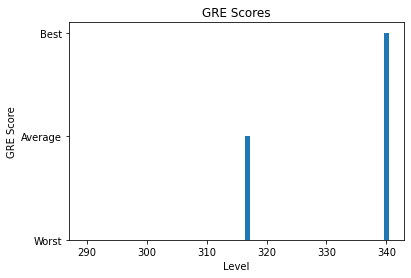

In [51]:

g = np.array([admission["GRE Score"].min(),admission["GRE Score"].mean(),admission["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

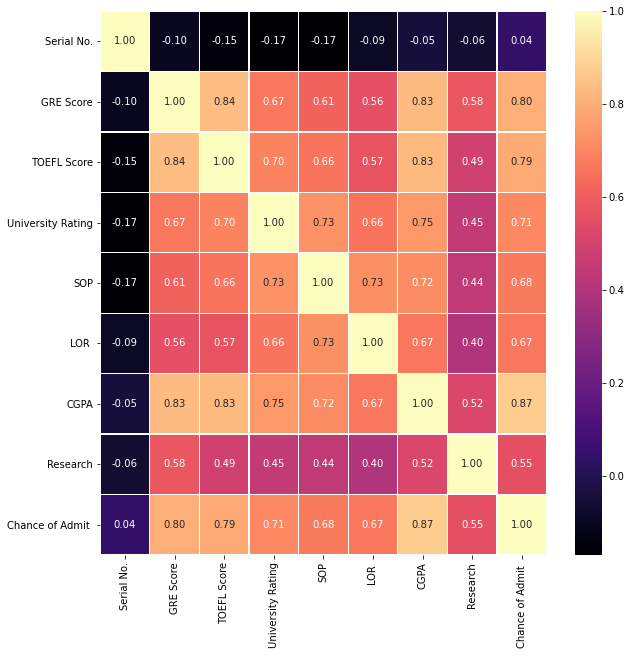

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

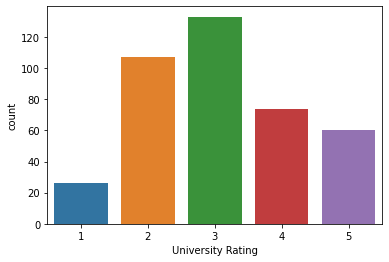

In [53]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

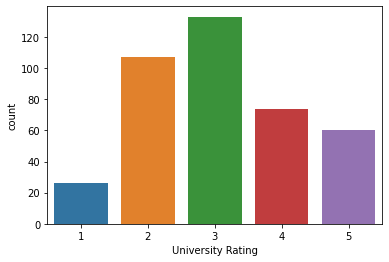

In [54]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

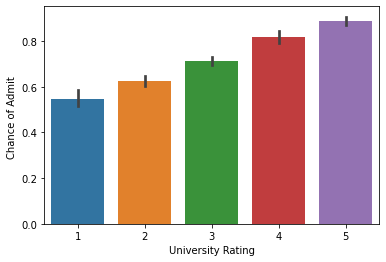

In [55]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=admission)

In [56]:
#splittin the input data(x) and output labels(y) into train data and test data 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) # test_size defins the volume of train data and test data here 0.2 means 20% of the data belongs to the test data

In [57]:
X_train.shape

(320, 7)

In [58]:
X_test.shape

(80, 7)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

<ipython-input-59-c93dc7eeb7c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-59-c93dc7eeb7c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
52,0.88,0.857143,0.75,0.750,0.428571,0.384615,1.0
193,0.92,0.928571,1.00,0.875,1.000000,0.875000,1.0
254,0.62,0.785714,0.75,0.750,1.000000,0.743590,0.0
110,0.30,0.571429,1.00,0.500,0.428571,0.538462,0.0
132,0.38,0.464286,1.00,0.625,0.571429,0.564103,0.0


In [60]:
import pickle
pickle. dump(scaler, open('scaler_admin', 'wb'))

In [61]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
import pickle
pickle. dump(rgr, open('randomreg_chronic', 'wb'))

In [63]:
rgr.score(X_test,y_test)

0.7635565702134127

In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
xg.score(X_test,y_test)

0.68605527012474

In [67]:
y_predict=rgr.predict(X_test)
y_predict
#Y_test.shape

array([0.5589, 0.91  , 0.6264, 0.6276, 0.5292, 0.8248, 0.7708, 0.7359,
       0.7679, 0.7087, 0.687 , 0.6864, 0.8902, 0.4869, 0.735 , 0.5035,
       0.87  , 0.8359, 0.8753, 0.9239, 0.5333, 0.6632, 0.913 , 0.7791,
       0.6695, 0.4639, 0.4574, 0.5961, 0.9283, 0.7225, 0.6944, 0.7115,
       0.6447, 0.6918, 0.6877, 0.6341, 0.5782, 0.4979, 0.747 , 0.687 ,
       0.6606, 0.8023, 0.7018, 0.6518, 0.8042, 0.713 , 0.6711, 0.9118,
       0.8532, 0.7001, 0.7722, 0.7894, 0.6838, 0.5591, 0.9262, 0.7636,
       0.731 , 0.6366, 0.9382, 0.9158, 0.5285, 0.4566, 0.9142, 0.8174,
       0.8158, 0.5267, 0.6199, 0.9585, 0.5468, 0.6705, 0.7796, 0.645 ,
       0.7741, 0.5425, 0.7359, 0.8085, 0.9045, 0.5437, 0.6582, 0.7427])

In [68]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.05008374999999998
Mean Squared Error: 0.004864454124999992
Root Mean Squared Error: 0.0697456387525413
